# EDA_FE 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [51]:
df = pd.read_csv('/content/drive/MyDrive/ybigta/교육세션/과제/airbnb_listings.csv의 사본', index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [6]:
# Q1
pd.set_option('display.max_columns', None)
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [52]:
# Q2
df_null = df.isnull().sum()

In [56]:
#Q2 
df_null_proportion = df_null.sort_values(ascending = False)/df.shape[0]
df_null_proportion.drop(df_null_proportion[(df_null_proportion == 0)].index, inplace = True)

- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

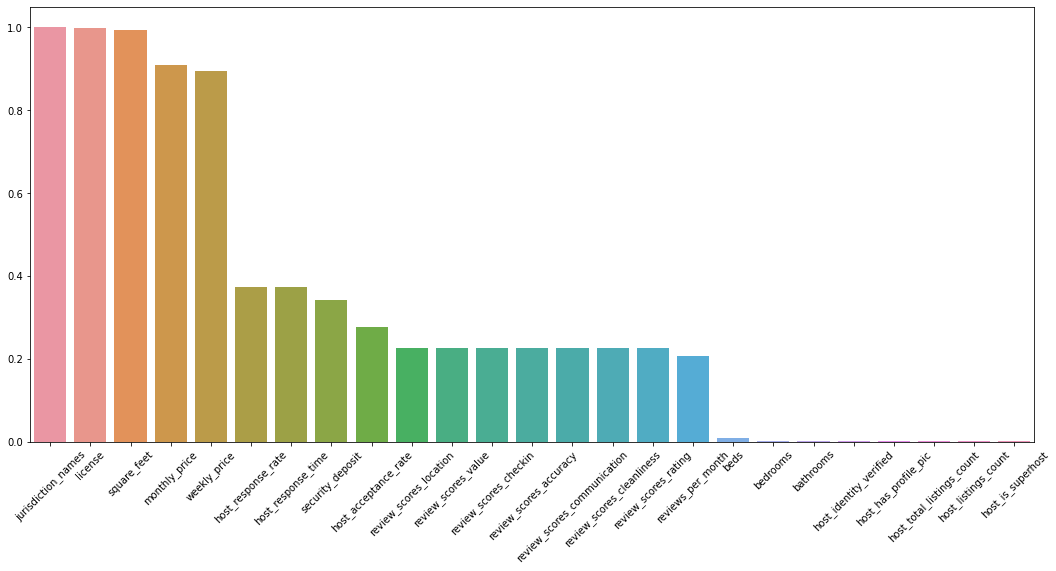

In [57]:
# Q3
plt.figure(figsize = (18,8))
plt.xticks(rotation = 45)
sns.barplot(x = df_null_proportion.index, y = df_null_proportion.values)

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [12]:
# Q4

df[df['beds'].isnull()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [13]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [14]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

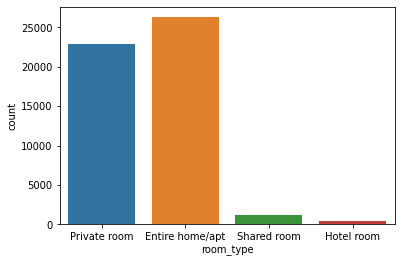

In [16]:
# Q5
sns.countplot(x = 'room_type', data = df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

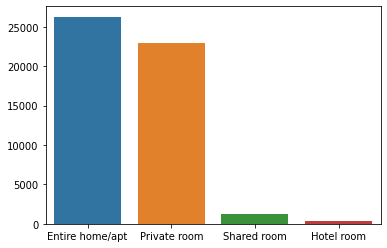

In [22]:
# Q6
room_count = df.room_type.value_counts()
room_proportion = room_count / room_count.sum()
sns.barplot(x = room_proportion.index, y = room_count.values)

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


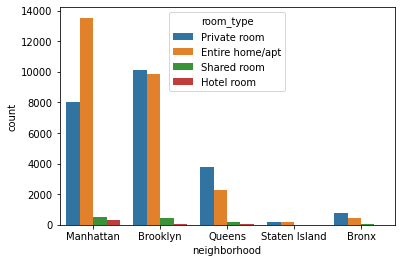

In [18]:
# Q7
sns.countplot('neighborhood', hue = 'room_type', data = df)

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

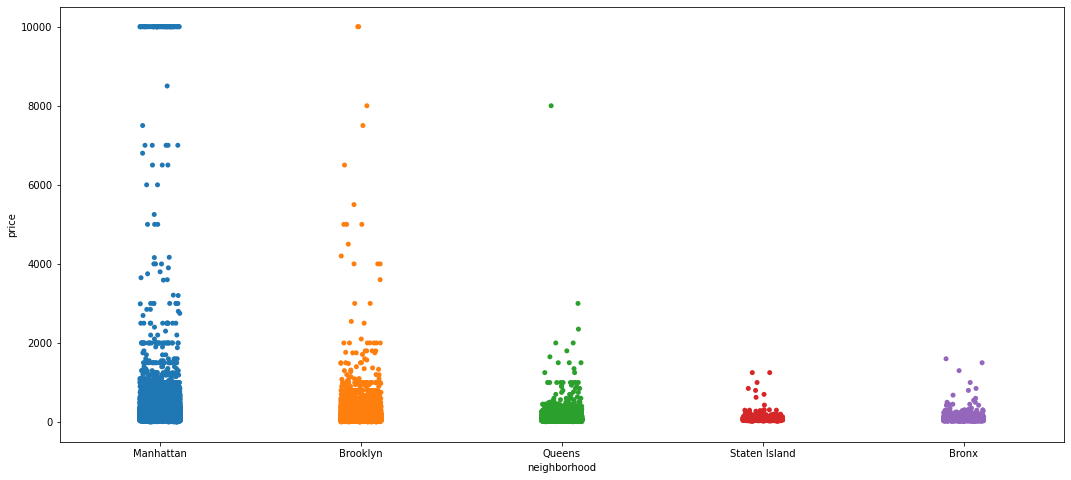

In [23]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize = (18,8))
ax = sns.stripplot(x = 'neighborhood', y = 'price', data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [58]:
# Q9

#집/아파트, 사무실을 대여해주는 상품이 많았다. 전체 비율로 놓고 봐도 그렇고, 각 지역의 경우에도 그러하다. 대부분의 지역에서 저가 상품이 대부분을 차지한다. 
#예외적으로 맨헤튼, 브루클린에 고가 상품이 제법 존재하고, 멘해튼의 경우 초고가 상품이 여럿 분포한다. 집/아파트와 사무실은 관리가 편하고 빌려주기가 수월해 
#전형적인 에어비앤비 상품의 형태일 것이다. 도심에 가까워질수록 사람이 많이 모이므로 상품 비용은 점점 증가한다. 대부분 지역에서 여행 숙박 목적 상품이 많기에 
#저가상품이 여럿 존재하지만, 멘해튼의 경우 초호화 숙박시설이 발달되어 초고가 상품도 존재하는 것으로 보인다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

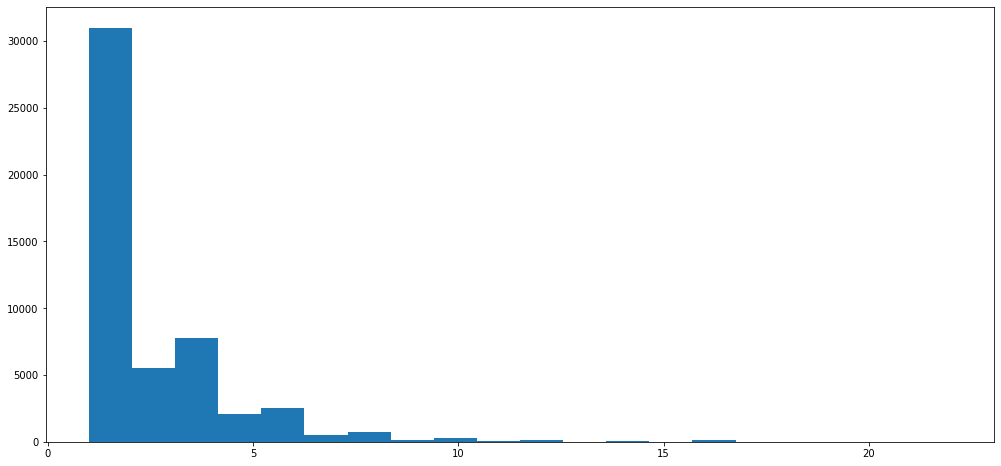

In [24]:
# Q10
plt.figure(figsize = (17,8))
ax = plt.hist(x = 'accommodates', data = df, bins = 20)

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

(array([1.820e+02, 5.148e+03, 9.263e+03, 8.275e+03, 5.970e+03, 4.412e+03,
        4.141e+03, 3.281e+03, 2.350e+03, 1.211e+03, 1.482e+03, 9.400e+02,
        8.160e+02, 3.550e+02, 4.920e+02, 3.380e+02, 2.990e+02, 1.110e+02,
        2.030e+02, 1.520e+02, 2.000e+02, 3.700e+01, 8.700e+01, 7.700e+01,
        8.100e+01, 1.100e+01, 4.900e+01, 4.100e+01, 4.000e+01, 1.800e+01,
        6.300e+01, 3.300e+01, 6.600e+01, 6.000e+00, 2.500e+01, 1.400e+01,
        2.400e+01, 6.000e+00, 1.400e+01, 1.310e+02]),
 array([   0.,   25.,   50.,   75.,  100.,  125.,  150.,  175.,  200.,
         225.,  250.,  275.,  300.,  325.,  350.,  375.,  400.,  425.,
         450.,  475.,  500.,  525.,  550.,  575.,  600.,  625.,  650.,
         675.,  700.,  725.,  750.,  775.,  800.,  825.,  850.,  875.,
         900.,  925.,  950.,  975., 1000.]),
 <a list of 40 Patch objects>)

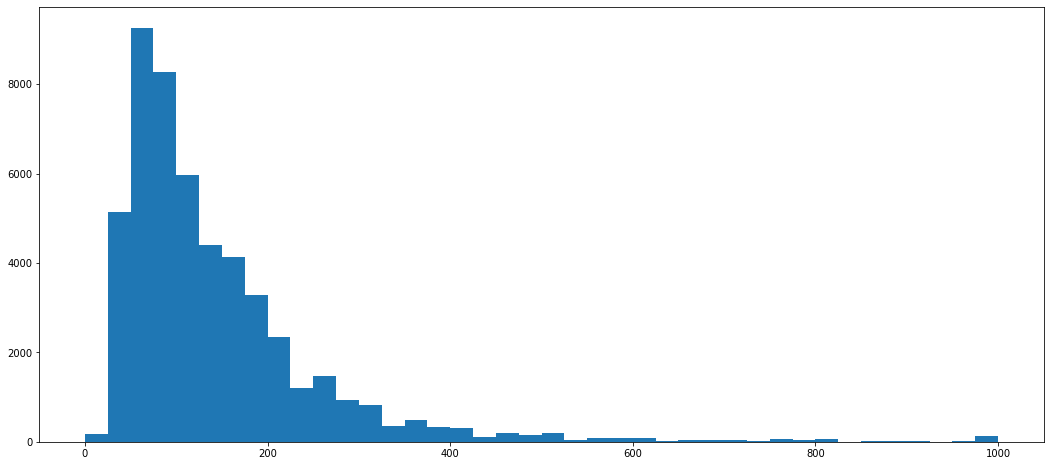

In [29]:
# Q11
plt.figure(figsize = (18,8))
plt.hist(x = 'price', data = df, bins = 40, range = (0,1000))

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [43]:
df = pd.read_csv('/content/drive/MyDrive/ybigta/교육세션/0110 EDA FE/airbnb_listings.csv', index_col=0)
df.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(50796, 54)

- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [47]:
#Q12
df_nullproportion = df.isnull().sum()/df.shape[0]
for i in df.columns:
  if df_nullproportion[i] >= 0.25:
    df.drop(i, axis = 1, inplace = True)
  elif df_nullproportion[i] >= 0.1:
    df.drop(df[df[i].isnull()].index, inplace = True)
  else:
    if (df[i].dtype == np.int) or (df[i].dtype == np.float):
      df[i].fillna(df[i].median())
    else:
      df[i].fillna(df[i].mode())

<ipython-input-47-06fdd932f584>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df[i].dtype == np.int) or (df[i].dtype == np.float):
<ipython-input-47-06fdd932f584>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecate

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31107 entries, 1 to 50694
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31107 non-null  int64  
 1   host_acceptance_rate              31107 non-null  object 
 2   host_is_superhost                 31107 non-null  object 
 3   host_listings_count               31107 non-null  float64
 4   host_total_listings_count         31107 non-null  float64
 5   host_verifications                31107 non-null  object 
 6   host_has_profile_pic              31107 non-null  object 
 7   host_identity_verified            31107 non-null  object 
 8   neighborhood                      31107 non-null  object 
 9   latitude                          31107 non-null  float64
 10  longitude                         31107 non-null  float64
 11  is_location_exact                 31107 non-null  object 
 12  prop

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [60]:
#Q13-1)
df['Internet availability'] = df['amenities'].apply(lambda x: True if ('Internet' in x) and ('Wifi' in x) else False)
df['Internet availability']

#인터넷 사용 가능 여부는 매우 중요하다. 인터넷 사용이 불가한 경우 사전에 인터넷을 사용할 체비를 해야 하기 때문이다. 가격 책정에 사용하지 않더라도
#사용자에게 제공되면 유용할 정보인 듯 하여 따로 정리하였다.

0         True
1        False
2         True
3         True
4         True
         ...  
50791    False
50792    False
50793    False
50794    False
50795    False
Name: Internet availability, Length: 50796, dtype: bool

In [61]:
#Q13-2)
bed_source = df['beds'].apply(lambda x: 2*x)
df['Bed sufficiency'] = bed_source >= df['accommodates']
df['Bed sufficiency']

#서양 문화권에서는 바닥에 누워 자지 않기 때문에 안정적인 숙박이 가능하려면 적어도 2인당 1대의 침대가 있어야 한다. 
#수용 가능 인원에 비해 충분한 침대가 구비되어있는지 여부를 새로운 feature로 추가하였다.

0         True
1         True
2         True
3         True
4         True
         ...  
50791     True
50792    False
50793     True
50794    False
50795     True
Name: Bed sufficiency, Length: 50796, dtype: bool

In [68]:
#Q13-3)
s1 = df['host_has_profile_pic'].apply(lambda x: 30 if x == 't' else 0)
s2 = df['host_identity_verified'].apply(lambda x: 50 if x == 't' else 0)
s3 = df['host_is_superhost'].apply(lambda x: 40 if x == 't' else 0)

df['host_reliability_score'] = s1 + s2 + s3
df['host_reliability_score']

#호스트를 평가할 수 있는 여러 지표를 종합적인 점수 (~100점)으로 나타낼 수 있는 지표를 제공합니다.
#호스트의 신뢰에 대해 전반적인 평가를 내려줍니다.

0        30
1        80
2        80
3        30
4        30
         ..
50791    30
50792    80
50793    30
50794    30
50795    30
Name: host_reliability_score, Length: 50796, dtype: int64

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. 
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
